# DDOT

## Setup

In [ ]:
# Install necessary libraries
!pip install roboflow ultralytics -q

In [ ]:
# Import necessary libraries
import os
from roboflow import Roboflow
from ultralytics import YOLO

## Download the dataset from RoboFlow

In [ ]:
# Config Roboflow and downleoad v7
rf = Roboflow(api_key="PUT YOURS HERE :)")
project = rf.workspace().project("ddot-rctl7")
dataset = project.version(7).download("yolov8")

# Change directory to the dataset folder OPTIONAL
os.chdir(dataset.location)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.24, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to DDOT-7 in yolov8:: 100%|██████████| 170/170 [00:00<00:00, 5005.10it/s]


## Make our own .yaml file
- Copying the `default.yaml` file and renaming it to `config.yaml` and this is what are we going to use

In [ ]:
!yolo copy-cfg
!mv default_copy.yaml config.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/default.yaml copied to /content/DDOT-7/default_copy.yaml
Example YOLO command with this new custom cfg:
    yolo cfg='/content/DDOT-7/default_copy.yaml' imgsz=320 batch=8


## Initialize the YOLO model
- YOLO verion 8
- Use `config.yaml` which Train, Augmentation, Hyperparameters etc... settings are in 

In [ ]:
# YOLOv8 Large model
model = YOLO('yolov8l.pt')

# Train the model using ONLY the config.yaml file
model.train(cfg='config.yaml')

100%|██████████| 83.7M/83.7M [00:00<00:00, 373MB/s]


Ultralytics YOLOv8.2.24 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=300, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=DDOT, name=best_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 162MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/DDOT-7/train/labels... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<00:00, 522.11it/s]

train: WARNING ⚠️ /content/DDOT-7/train/images/-_png.rf.5804ea4d66d3fa9ffb7fdb285353d365.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/DDOT-7/train/images/-_png.rf.e87ca7b7f351076e63799dfb21a438fc.jpg: 1 duplicate labels removed
train: New cache created: /content/DDOT-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1056, len(boxes) = 18213. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



train: Caching images (0.1GB RAM): 100%|██████████| 62/62 [00:00<00:00, 224.55it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/DDOT-7/valid/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 159.04it/s]

val: New cache created: /content/DDOT-7/valid/labels.cache



val: Caching images (0.0GB RAM): 100%|██████████| 5/5 [00:00<00:00, 70.03it/s]


Plotting labels to DDOT/best_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to DDOT/best_model
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      9.57G      3.791      3.164      2.044       1985        640: 100%|██████████| 8/8 [00:29<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.24s/it]

                   all          5       2307      0.188      0.133      0.143     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      10.5G      2.758      1.922      1.465       2290        640: 100%|██████████| 8/8 [00:16<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all          5       2307      0.408       0.29       0.31      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      11.8G      2.395      1.524      1.361       2426        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          5       2307     0.0899     0.0554     0.0498     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      10.6G      2.273      1.412      1.343       1694        640: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          5       2307      0.221     0.0477       0.12     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      9.81G      2.381      1.366      1.351       2958        640: 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all          5       2307      0.283      0.041      0.152     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      8.82G      2.185      1.255      1.253       2203        640: 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all          5       2307      0.313     0.0894      0.184      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      11.1G      2.276      1.262      1.303       2558        640: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          5       2307      0.367      0.132       0.23      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      9.38G      2.177        1.3      1.248       2669        640: 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          5       2307      0.409      0.198      0.289       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      10.4G      2.194       1.41      1.275       1886        640: 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          5       2307      0.395      0.212      0.289      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      10.7G      2.246      1.343      1.267       2733        640: 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          5       2307      0.284      0.207      0.184     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      10.5G      2.235       1.32      1.282       3276        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          5       2307      0.478      0.243      0.339      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      10.8G      2.162      1.284      1.242       2749        640: 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          5       2307      0.485       0.19      0.315      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      9.32G      2.204      1.313      1.285       2696        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          5       2307      0.395      0.277      0.319      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      10.3G      2.088      1.206      1.232       2965        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all          5       2307      0.379      0.267      0.312      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      9.45G      2.133      1.206      1.245       2145        640: 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all          5       2307       0.36      0.209      0.273      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      10.6G      2.097      1.168      1.171       2335        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          5       2307      0.416      0.198      0.292      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300       9.5G      2.323      1.226       1.25       2306        640: 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          5       2307      0.383      0.249      0.298       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      9.48G      2.273      1.231      1.225       2361        640: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all          5       2307      0.458      0.238      0.308      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      8.91G      2.276      1.224      1.271       2567        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all          5       2307      0.368      0.258        0.3      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      10.6G      2.151      1.173      1.246       2187        640: 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          5       2307      0.394      0.268      0.318       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      9.47G      2.115      1.171      1.221       2082        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          5       2307      0.548      0.365      0.461      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      8.84G      1.987      1.234      1.222       1551        640: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all          5       2307      0.571      0.348      0.452      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      11.9G      1.984      1.114      1.196       2386        640: 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          5       2307      0.558      0.351      0.458       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300        11G      2.074      1.147      1.213       2378        640: 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          5       2307      0.459      0.327      0.393      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      11.1G      2.001      1.081      1.172       3644        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          5       2307      0.444      0.321      0.389      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      8.96G      2.046       1.18      1.185       3267        640: 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all          5       2307      0.504      0.347      0.445      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      11.6G      1.904      1.121      1.176       2574        640: 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          5       2307      0.532      0.333       0.44      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      7.83G      1.969      1.113      1.173       1900        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          5       2307      0.571      0.364      0.467       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300       7.6G      1.898      1.106      1.175       2455        640: 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all          5       2307      0.542      0.329      0.427      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      8.27G      1.957      1.127       1.18       3669        640: 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all          5       2307      0.503      0.298      0.392       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      8.33G       1.91      1.097       1.16       1746        640: 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          5       2307       0.56      0.334      0.443      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      9.63G      1.917      1.069      1.146       2408        640: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          5       2307      0.615      0.354      0.486      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      9.29G      1.853      1.075      1.137       2282        640: 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          5       2307      0.571      0.365      0.488      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      10.6G      1.875      1.084      1.148       3222        640: 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          5       2307      0.634      0.392      0.537      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      9.23G      1.826      1.106      1.146       1562        640: 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all          5       2307      0.652      0.382      0.529      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      10.2G      1.806      1.082      1.134       1964        640: 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all          5       2307      0.653      0.364        0.5      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300        11G      1.815      1.074      1.138       3644        640: 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all          5       2307      0.661      0.328       0.47      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      9.33G       1.73      1.014       1.12       1813        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all          5       2307      0.563      0.353      0.461      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      10.8G      1.856      1.119      1.138       2899        640: 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all          5       2307      0.557      0.371      0.478      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      8.87G       1.78      1.043      1.119       3221        640: 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all          5       2307      0.578      0.387       0.51      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      10.7G      1.819      1.099      1.179       2755        640: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all          5       2307      0.626      0.375      0.504      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      9.24G      1.769      1.006      1.115       1558        640: 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          5       2307      0.598      0.385        0.5       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      11.5G       1.76      1.032      1.139       3928        640: 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all          5       2307      0.633      0.379      0.508      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      8.18G      1.793     0.9715      1.108       3173        640: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          5       2307      0.643      0.373      0.512      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      7.71G      1.833          1      1.122       2278        640: 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          5       2307      0.586      0.386      0.502       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      9.12G      1.727      1.043      1.126       3634        640: 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          5       2307      0.584      0.386        0.5       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      9.82G      1.752      1.023      1.129       1728        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all          5       2307      0.617      0.391      0.506       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      7.79G      1.716      1.009      1.122       2051        640: 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          5       2307      0.552      0.392      0.484       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      8.94G      1.692      1.018      1.108       2422        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          5       2307      0.387      0.283      0.292      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300        12G      1.716     0.9868      1.113       2240        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all          5       2307      0.328      0.222      0.228      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      10.2G      1.688     0.9672      1.102       2961        640: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all          5       2307      0.396      0.274      0.328      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      9.88G      1.672      0.969      1.077       2567        640: 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all          5       2307      0.446      0.313      0.389      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      8.15G      1.677     0.9427       1.08       3349        640: 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          5       2307      0.601      0.336      0.455      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300       9.6G      1.674      1.011      1.096       2757        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          5       2307      0.458      0.329      0.413       0.22
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



54 epochs completed in 0.117 hours.
Optimizer stripped from DDOT/best_model/weights/last.pt, 87.6MB
Optimizer stripped from DDOT/best_model/weights/best.pt, 87.6MB

Validating DDOT/best_model/weights/best.pt...
Ultralytics YOLOv8.2.24 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


                   all          5       2307      0.637      0.392      0.538      0.291
                     0          5       1323       0.68      0.681      0.722       0.41
                     1          5        984      0.594      0.104      0.355      0.173
Speed: 0.3ms preprocess, 19.6ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to DDOT/best_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccde0ca43a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Export the model

In [ ]:
model.export(format='saved_model')

Ultralytics YOLOv8.2.24 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

PyTorch: starting from 'DDOT/best_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (83.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 125.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 145.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 323.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 277.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 225.9 MB/s

100%|██████████| 1.11M/1.11M [00:00<00:00, 123MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/DDOT-7/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 30.09file/s]


ONNX: starting export with onnx 1.16.1 opset 17...


ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 10.3s, saved as 'DDOT/best_model/weights/best.onnx' (166.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 128.6s, saved as 'DDOT/best_model/weights/best_saved_model' (416.6 MB)

Export complete (138.8s)
Results saved to /content/DDOT-7/DDOT/best_model/weights
Predict:         yolo predict task=detect model=DDOT/best_model/weights/best_saved_model imgsz=640  
Validate:        yolo val task=detect model=DDOT/best_model/weights/best_saved_model imgsz=640 data=data.yaml  
Visualize:       https://netron.app


'DDOT/best_model/weights/best_saved_model'

## Saving the whole DDOT file which includs `best_model`

In [ ]:
# import shutil

# # Mount before running this  :)

# # Define the source and destination paths
# source_dir = '/content/DDOT-7/DDOT'
# destination_dir = '/content/drive/MyDrive/DDOT'

# # Copying the directory to Google Drive
# shutil.copytree(source_dir, destination_dir)

# print(f"Directory '{source_dir}' copied to '{destination_dir}'")

Directory '/content/DDOT-7/DDOT' copied to '/content/drive/MyDrive/DDOT'


## TESTING

Keep in mind that the test and validation data is the most difficult in the dataset
- Random test to just see how well the model is without post processing 


image 1/1 /content/DDOT-7/valid/images/-_png.rf.4133e53dfb26d814826fea5772cc72cc.jpg: 544x640 253 0s, 47 1s, 80.2ms
Speed: 12.6ms preprocess, 80.2ms inference, 11.2ms postprocess per image at shape (1, 3, 544, 640)


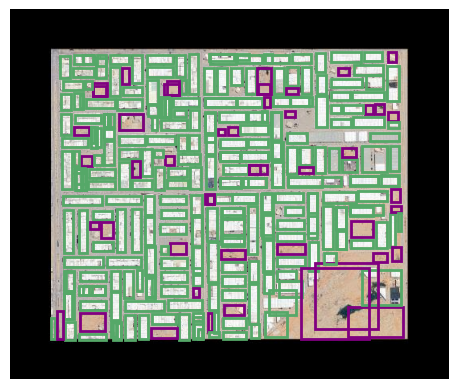

In [ ]:
import os
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# Define the validation images directory
val_images_dir = '/content/DDOT-7/valid/images'  # Ensure this path is correct

# Select a random image from the validation dataset
random_image = random.choice(os.listdir(val_images_dir))
random_image_path = os.path.join(val_images_dir, random_image)

# Load the image
img = Image.open(random_image_path)

# Run inference
results = model(random_image_path)

# Define colors for the two classes
colors = ['g', 'purple']  # Green for class 0 (developed land), Purple for class 1 (undeveloped land) :)

# Function to plot the image with bounding boxes
def plot_image_with_boxes(image, boxes, class_ids):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for i, box in enumerate(boxes):
        # Get box coordinates
        x1, y1, x2, y2 = box[:4]
        width = x2 - x1
        height = y2 - y1
        class_id = int(class_ids[i])
        color = colors[class_id]
        # Create a Rectangle patch
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.axis('off')  # Hide axes
    plt.show()

# Extract bounding boxes and class IDs from results
boxes = results[0].boxes.xyxy.cpu().numpy()  # Assuming you are using a GPU; remove .cpu() if not
class_ids = results[0].boxes.cls.cpu().numpy()  # Class IDs for the bounding boxes

# Plot the image with bounding boxes
plot_image_with_boxes(img, boxes, class_ids)


- Apply non-maximum suppression


image 1/1 /content/DDOT-7/valid/images/-_png.rf.647c60b367709c5d0d22ae0c3573a8b1.jpg: 544x640 289 0s, 11 1s, 60.0ms
Speed: 4.5ms preprocess, 60.0ms inference, 2.9ms postprocess per image at shape (1, 3, 544, 640)


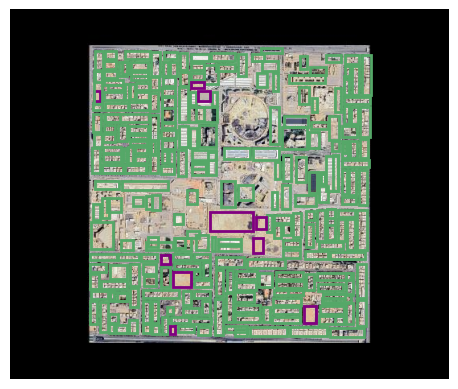

In [ ]:
import torch
from torchvision.ops import nms

# Define the validation images directory
val_images_dir = '/content/DDOT-7/valid/images'  # Ensure this path is correct

# Select a random image from the validation dataset
random_image = random.choice(os.listdir(val_images_dir))
random_image_path = os.path.join(val_images_dir, random_image)

# Load the image
img = Image.open(random_image_path)

# Run inference
results = model(random_image_path)

# Define colors for the two classes
colors = ['g', 'purple']  # Green for class 0 (developed land), Purple for class 1 (undeveloped land) :)

# Function to plot the image with bounding boxes
def plot_image_with_boxes(image, boxes, class_ids):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for i, box in enumerate(boxes):
        # Get box coordinates
        x1, y1, x2, y2 = box[:4]
        width = x2 - x1
        height = y2 - y1
        class_id = int(class_ids[i])
        color = colors[class_id]
        # Create a Rectangle patch
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.axis('off')  # Hide axes
    plt.show()

# Extract bounding boxes and class IDs from results
boxes = results[0].boxes.xyxy.cpu()  # Assuming you are using a GPU; remove .cpu() if not
scores = results[0].boxes.conf.cpu()  # Confidence scores for the boxes
class_ids = results[0].boxes.cls.cpu()  # Class IDs for the bounding boxes

# Apply Non-Maximum Suppression (NMS)
nms_indices = nms(boxes, scores, iou_threshold=0.5)  # Adjust the IoU threshold as necessary

# Filter boxes, scores, and class_ids using NMS
boxes = boxes[nms_indices].numpy()
class_ids = class_ids[nms_indices].numpy()

# Plot the image with bounding boxes
plot_image_with_boxes(img, boxes, class_ids)


- Makeing the boxes thinner since the image is very dense


image 1/1 /content/DDOT-7/valid/images/-_png.rf.3fe2cad533c0c3ae3e93fad4704a009a.jpg: 544x640 251 0s, 49 1s, 59.9ms
Speed: 3.1ms preprocess, 59.9ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)


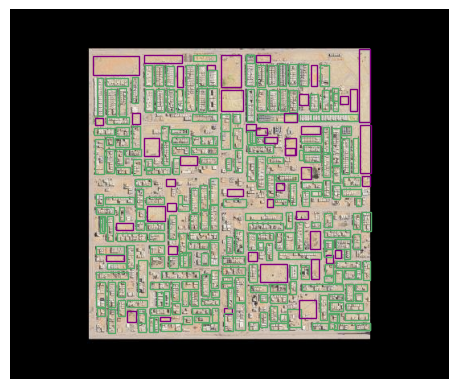

In [ ]:
# Define the validation images directory
val_images_dir = '/content/DDOT-7/valid/images'  # Ensure this path is correct

# Select a random image from the validation dataset
random_image = random.choice(os.listdir(val_images_dir))
random_image_path = os.path.join(val_images_dir, random_image)

# Load the image
img = Image.open(random_image_path)

# Run inference
results = model(random_image_path)

# Define colors for the two classes
colors = ['g', 'purple']  # Green for class 0 (developed land), Purple for class 1 (undeveloped land) :)

# Function to plot the image with bounding boxes
def plot_image_with_boxes(image, boxes, class_ids):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for i, box in enumerate(boxes):
        # Get box coordinates
        x1, y1, x2, y2 = box[:4]
        width = x2 - x1
        height = y2 - y1
        class_id = int(class_ids[i])
        color = colors[class_id]
        # Create a Rectangle patch with thinner lines
        rect = Rectangle((x1, y1), width, height, linewidth=1, edgecolor=color, facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.axis('off')  # Hide axes
    plt.show()

# Extract bounding boxes and class IDs from results
boxes = results[0].boxes.xyxy.cpu()  # Assuming you are using a GPU; remove .cpu() if not
scores = results[0].boxes.conf.cpu()  # Confidence scores for the boxes
class_ids = results[0].boxes.cls.cpu()  # Class IDs for the bounding boxes

# Apply Non-Maximum Suppression (NMS)
nms_indices = nms(boxes, scores, iou_threshold=0.5)  # Adjust the IoU threshold as necessary

# Filter boxes, scores, and class_ids using NMS
boxes = boxes[nms_indices].numpy()
class_ids = class_ids[nms_indices].numpy()

# Plot the image with bounding boxes
plot_image_with_boxes(img, boxes, class_ids)


## Continue TESTING 
- adding the feature where it calculates the sum of areas inside ech class boxes


image 1/1 /content/DDOT-7/valid/images/-_png.rf.647c60b367709c5d0d22ae0c3573a8b1.jpg: 544x640 289 0s, 11 1s, 59.9ms
Speed: 3.0ms preprocess, 59.9ms inference, 2.6ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 62946.065937042236 square pixels
Total undeveloped land area: 3043.178867340088 square pixels


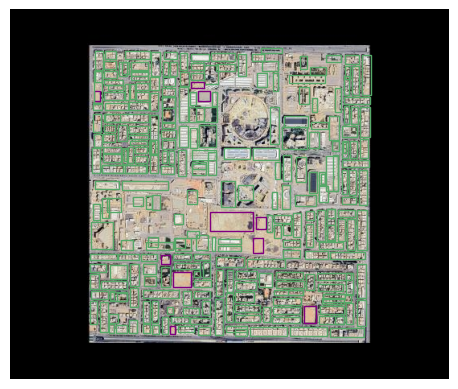

In [ ]:
# Define the validation images directory
val_images_dir = '/content/DDOT-7/valid/images'  # Ensure this path is correct

# Select a random image from the validation dataset
random_image = random.choice(os.listdir(val_images_dir))
random_image_path = os.path.join(val_images_dir, random_image)

# Load the image
img = Image.open(random_image_path)

# Run inference
results = model(random_image_path)

# Define colors for the two classes
colors = ['g', 'purple']  # Green for class 0 (developed land), Purple for class 1 (undeveloped land) :)

# Function to plot the image with bounding boxes
def plot_image_with_boxes(image, boxes, class_ids):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for i, box in enumerate(boxes):
        # Get box coordinates
        x1, y1, x2, y2 = box[:4]
        width = x2 - x1
        height = y2 - y1
        class_id = int(class_ids[i])
        color = colors[class_id]
        # Create a Rectangle patch with thinner lines
        rect = Rectangle((x1, y1), width, height, linewidth=1, edgecolor=color, facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.axis('off')  # Hide axes
    plt.show()

# Extract bounding boxes and class IDs from results
boxes = results[0].boxes.xyxy.cpu()  # Assuming you are using a GPU; remove .cpu() if not
scores = results[0].boxes.conf.cpu()  # Confidence scores for the boxes
class_ids = results[0].boxes.cls.cpu()  # Class IDs for the bounding boxes

# Apply Non-Maximum Suppression (NMS)
nms_indices = nms(boxes, scores, iou_threshold=0.5)  # Adjust the IoU threshold as necessary

# Filter boxes, scores, and class_ids using NMS
boxes = boxes[nms_indices].numpy()
class_ids = class_ids[nms_indices].numpy()

# Calculate the areas for developed and undeveloped lands
developed_area = 0
undeveloped_area = 0

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box[:4]
    width = x2 - x1
    height = y2 - y1
    area = width * height
    if int(class_ids[i]) == 0:  # Developed land
        developed_area += area
    else:  # Undeveloped land
        undeveloped_area += area

print(f"Total developed land area: {developed_area} square pixels {developed_area // (developed_area+undeveloped_area)} %")
print(f"Total undeveloped land area: {undeveloped_area} square pixels {developed_area // (developed_area+undeveloped_area)} %")

# Plot the image with bounding boxes
plot_image_with_boxes(img, boxes, class_ids)


- Testing all Test data with thier post proccecing calculation (presentage of developed and undeveloped lands)
- AGAIN, THESE EXAMPLES ARE THE MOST DIFFICLUT TO REALLY TEST THE MODEL
    - Some of the following examples are not fully disricts

Processing -_png.rf.e63aa923ccc0edccde1593be6cc57665.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.e63aa923ccc0edccde1593be6cc57665.jpg: 544x640 122 0s, 64 1s, 59.9ms
Speed: 3.4ms preprocess, 59.9ms inference, 3.9ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 21764.526195526123 square pixels
Total undeveloped land area: 101884.48538208008 square pixels


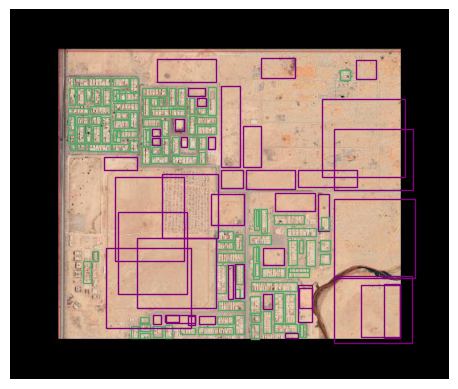

Processing -_png.rf.5905b9dd2bde849b6efeb3f136df9654.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.5905b9dd2bde849b6efeb3f136df9654.jpg: 544x640 129 0s, 84 1s, 64.0ms
Speed: 3.5ms preprocess, 64.0ms inference, 3.0ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 50767.56675720215 square pixels
Total undeveloped land area: 17908.11354827881 square pixels


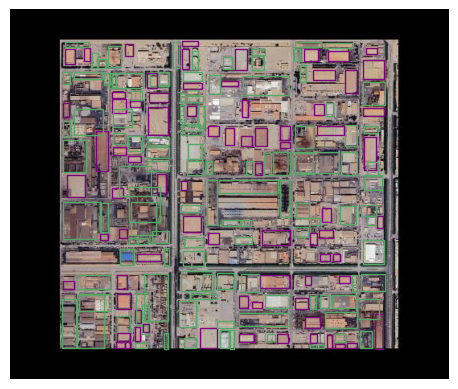

Processing -_png.rf.233d496ad1d8b7dd88d8d27163217e1b.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.233d496ad1d8b7dd88d8d27163217e1b.jpg: 544x640 87 0s, 45 1s, 59.8ms
Speed: 6.7ms preprocess, 59.8ms inference, 3.0ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 62053.51509094238 square pixels
Total undeveloped land area: 83446.86796569824 square pixels


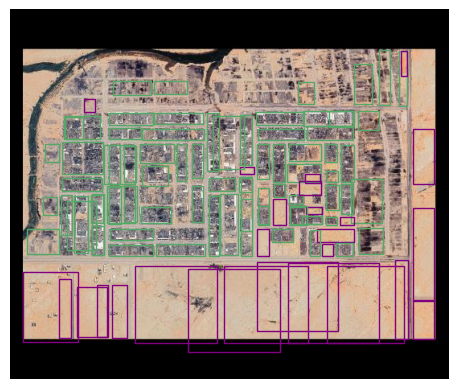

Processing -_png.rf.b9cbedb142771a32c5c74a978d5a52d6.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.b9cbedb142771a32c5c74a978d5a52d6.jpg: 544x640 104 0s, 42 1s, 59.8ms
Speed: 4.1ms preprocess, 59.8ms inference, 2.8ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 31545.47407913208 square pixels
Total undeveloped land area: 17780.118545532227 square pixels


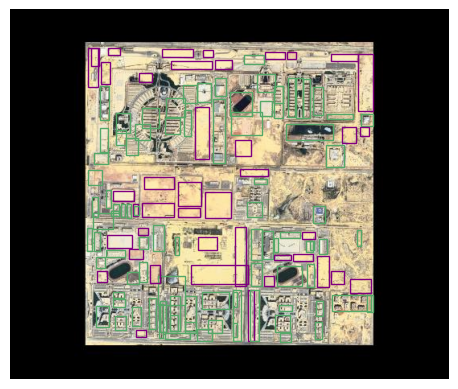

Processing -_png.rf.d34108df4c80726b52707e378563fd4e.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.d34108df4c80726b52707e378563fd4e.jpg: 544x640 207 0s, 37 1s, 59.8ms
Speed: 3.4ms preprocess, 59.8ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 71389.96376419067 square pixels
Total undeveloped land area: 47031.72874832153 square pixels


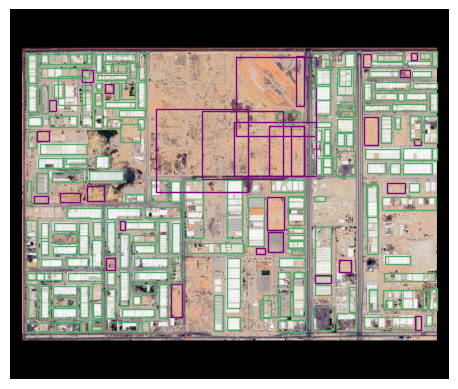

Processing -_png.rf.cf92777893a210dc3c2b32a41f4a159a.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.cf92777893a210dc3c2b32a41f4a159a.jpg: 544x640 191 0s, 57 1s, 59.9ms
Speed: 3.9ms preprocess, 59.9ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 57092.890323638916 square pixels
Total undeveloped land area: 20989.979942321777 square pixels


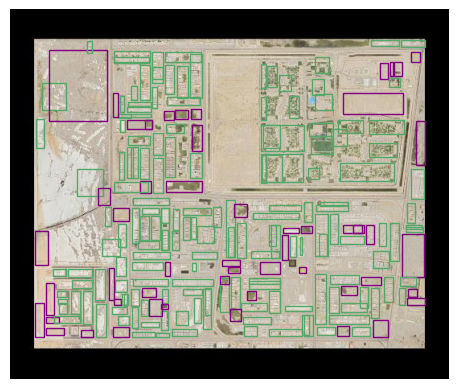

Processing -_png.rf.c6ea0d927f20078709d3f4c9115aaf3c.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.c6ea0d927f20078709d3f4c9115aaf3c.jpg: 544x640 300 0s, 59.8ms
Speed: 3.3ms preprocess, 59.8ms inference, 2.8ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 26127.583724975586 square pixels
Total undeveloped land area: 0 square pixels


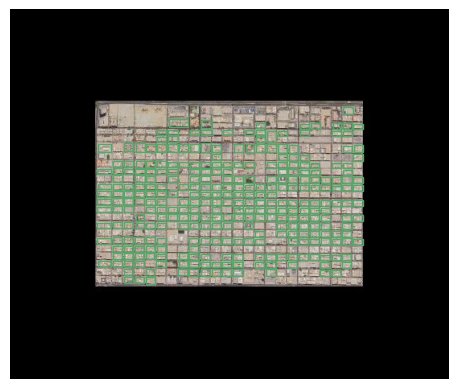

Processing -_png.rf.b42aa94d87b9d6051df181d68e71a5f0.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.b42aa94d87b9d6051df181d68e71a5f0.jpg: 544x640 192 0s, 58 1s, 60.3ms
Speed: 3.3ms preprocess, 60.3ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 33592.12638092041 square pixels
Total undeveloped land area: 14877.921485900879 square pixels


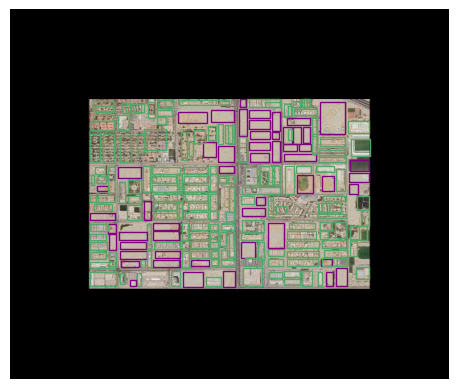

Processing -f-_png.rf.b3d18257b9e96262cb7cf693ef97a30c.jpg...

image 1/1 /content/DDOT-7/test/images/-f-_png.rf.b3d18257b9e96262cb7cf693ef97a30c.jpg: 544x640 3 0s, 36 1s, 59.8ms
Speed: 3.6ms preprocess, 59.8ms inference, 2.2ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 1454.86865234375 square pixels
Total undeveloped land area: 31156.955696105957 square pixels


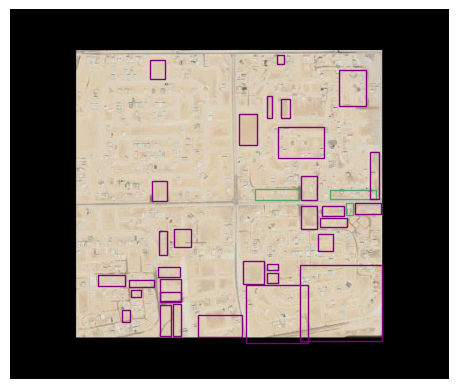

Processing -_png.rf.7f94d52435e5520cadcc257a7b24ff8c.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.7f94d52435e5520cadcc257a7b24ff8c.jpg: 544x640 145 0s, 15 1s, 59.8ms
Speed: 6.5ms preprocess, 59.8ms inference, 2.4ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 31270.538425445557 square pixels
Total undeveloped land area: 2127.1723861694336 square pixels


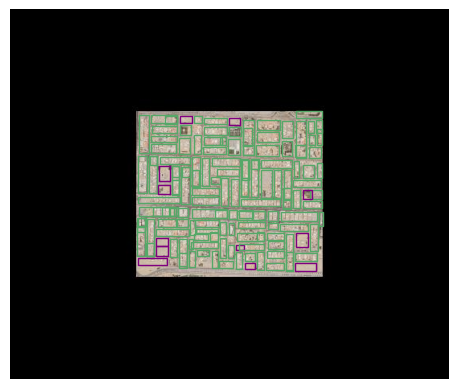

Processing -_png.rf.297031cf122d9dfb13f76da4b2f177b7.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.297031cf122d9dfb13f76da4b2f177b7.jpg: 544x640 202 0s, 43 1s, 59.8ms
Speed: 3.3ms preprocess, 59.8ms inference, 5.6ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 70752.88885498047 square pixels
Total undeveloped land area: 13118.182754516602 square pixels


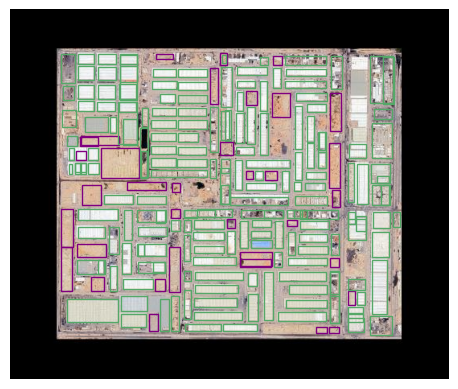

Processing -_png.rf.5e5c7037311a19da3c5fefebca982d7b.jpg...

image 1/1 /content/DDOT-7/test/images/-_png.rf.5e5c7037311a19da3c5fefebca982d7b.jpg: 544x640 191 0s, 88 1s, 59.8ms
Speed: 7.6ms preprocess, 59.8ms inference, 6.6ms postprocess per image at shape (1, 3, 544, 640)
Total developed land area: 51089.63515472412 square pixels
Total undeveloped land area: 181005.4095916748 square pixels


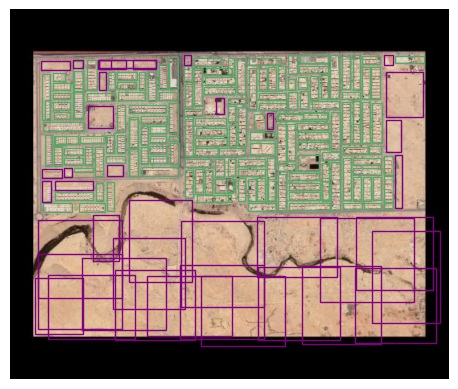

In [ ]:
# Define colors for the two classes
colors = ['g', 'purple']  # Green for class 0 (developed land), Purple for class 1 (undeveloped land)

# Function to plot the image with bounding boxes and calculate areas
def plot_and_calculate_areas(image_path, model):
    img = Image.open(image_path)

    # Run inference
    results = model(image_path)

    # Extract bounding boxes and class IDs from results
    boxes = results[0].boxes.xyxy.cpu()  # Assuming you are using a GPU; remove .cpu() if not
    scores = results[0].boxes.conf.cpu()  # Confidence scores for the boxes
    class_ids = results[0].boxes.cls.cpu()  # Class IDs for the bounding boxes

    # Apply Non-Maximum Suppression (NMS)
    nms_indices = nms(boxes, scores, iou_threshold=0.5)  # Adjust the IoU threshold as necessary

    # Filter boxes, scores, and class_ids using NMS
    boxes = boxes[nms_indices].numpy()
    class_ids = class_ids[nms_indices].numpy()

    # Calculate the areas for developed and undeveloped lands
    developed_area = 0
    undeveloped_area = 0

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box[:4]
        width = x2 - x1
        height = y2 - y1
        area = width * height
        if int(class_ids[i]) == 0:  # Developed land
            developed_area += area
        else:  # Undeveloped land
            undeveloped_area += area

    print(f"Total developed land area: {developed_area} square pixels")
    print(f"Total undeveloped land area: {undeveloped_area} square pixels")

    # Plot the image with bounding boxes
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for i, box in enumerate(boxes):
        # Get box coordinates
        x1, y1, x2, y2 = box[:4]
        width = x2 - x1
        height = y2 - y1
        class_id = int(class_ids[i])
        color = colors[class_id]
        # Create a Rectangle patch with thinner lines
        rect = Rectangle((x1, y1), width, height, linewidth=1, edgecolor=color, facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.axis('off')  # Hide axes
    plt.show()

# Define the test images directory
test_images_dir = '/content/DDOT-7/test/images'  # Ensure this path is correct

# Process each image in the test dataset
for image_name in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_name)
    print(f"Processing {image_name}...")
    plot_and_calculate_areas(image_path, model)


In [ ]:
# # Define colors for the two classes
# colors = ['g', 'purple']  # Green for class 0 (developed land), Purple for class 1 (undeveloped land)

# # Function to calculate the intersection area of two boxes
# def calculate_intersection_area(box1, box2):
#     x1 = max(box1[0], box2[0])
#     y1 = max(box1[1], box2[1])
#     x2 = min(box1[2], box2[2])
#     y2 = min(box1[3], box2[3])
#     width = max(0, x2 - x1)
#     height = max(0, y2 - y1)
#     return width * height

# # Function to calculate total area for a class without double-counting overlaps
# def calculate_total_area(boxes):
#     total_area = 0
#     for i, box in enumerate(boxes):
#         x1, y1, x2, y2 = box[:4]
#         width = x2 - x1
#         height = y2 - y1
#         area = width * height
#         overlap_area = 0
#         for j in range(i):
#             overlap_area += calculate_intersection_area(box, boxes[j])
#         total_area += area - overlap_area
#     return total_area

# # Function to plot the image with bounding boxes and calculate areas
# def plot_and_calculate_areas(image_path, model):
#     img = Image.open(image_path)

#     # Run inference
#     results = model(image_path)

#     # Extract bounding boxes and class IDs from results
#     boxes = results[0].boxes.xyxy.cpu()  # Assuming you are using a GPU; remove .cpu() if not
#     scores = results[0].boxes.conf.cpu()  # Confidence scores for the boxes
#     class_ids = results[0].boxes.cls.cpu()  # Class IDs for the bounding boxes

#     # Apply Non-Maximum Suppression (NMS)
#     nms_indices = nms(boxes, scores, iou_threshold=0.5)  # Adjust the IoU threshold as necessary

#     # Filter boxes, scores, and class_ids using NMS
#     boxes = boxes[nms_indices].numpy()
#     class_ids = class_ids[nms_indices].numpy()

#     # Separate boxes by class
#     developed_boxes = [boxes[i] for i in range(len(boxes)) if class_ids[i] == 0]
#     undeveloped_boxes = [boxes[i] for i in range(len(boxes)) if class_ids[i] == 1]

#     # Calculate the areas for developed and undeveloped lands without double-counting overlaps
#     developed_area = calculate_total_area(developed_boxes)
#     undeveloped_area = calculate_total_area(undeveloped_boxes)

#     print(f"Total developed land area: {developed_area} square pixels")
#     print(f"Total undeveloped land area: {undeveloped_area} square pixels")

#     # Plot the image with bounding boxes
#     fig, ax = plt.subplots(1)
#     ax.imshow(img)
#     for i, box in enumerate(boxes):
#         # Get box coordinates
#         x1, y1, x2, y2 = box[:4]
#         width = x2 - x1
#         height = y2 - y1
#         class_id = int(class_ids[i])
#         color = colors[class_id]
#         # Create a Rectangle patch with thinner lines
#         rect = Rectangle((x1, y1), width, height, linewidth=1, edgecolor=color, facecolor='none')
#         # Add the patch to the Axes
#         ax.add_patch(rect)
#     plt.axis('off')  # Hide axes
#     plt.show()

# # Define the test images directory
# test_images_dir = '/content/DDOT-7/test/images'  # Ensure this path is correct

# # Process each image in the test dataset
# for image_name in os.listdir(test_images_dir):
#     image_path = os.path.join(test_images_dir, image_name)
#     print(f"Processing {image_name}...")
#     plot_and_calculate_areas(image_path, model)
